# Worksheet 9 - Regression Continued

### Lecture and Tutorial Learning Goals:

By the end of the week, students will be able to:

- Perform ordinary least squares regression in R using caret’s train with `method = "lm"` to predict the values for a test dataset.
- Compare and contrast predictions obtained from k-nearest neighbour regression to those obtained using simple ordinary least squares regression from the same dataset.
- In R, overlay the ordinary least squares regression lines from geom_smooth on a single plot.

In [1]:
### Run this cell before continuing.
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(caret)
library(gridExtra)
source("tests_worksheet_09.R")
source('cleanup_worksheet_09.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following object is masked from ‘package:tidyr’:

    matches


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




### Warm-up Questions

Here are some warm-up questions on the topic of multivariate regression to get you thinking before we jump into data analysis. The course readings should help you answer these.

**Question 1.0** Multiple Choice: 
<br> {points: 1}

In multivariate k-nn regression with one outcome/target variable and two predictor variables, the predictions take the form of what shape?

A. a flat plane

B. a wiggly/flexible plane

C. A straight line

D. a wiggly/flexible line

E. a 4D hyperplane

F. a 4D wiggly/flexible hyperplane

Save the letter of the answer you think is correct to a variable named `answer1.0`. Make sure you put quotations around the letter and pay attention to case.

In [2]:
# your code here
answer1.0 = 'B'

In [3]:
test_1.0()

[1] "Success!"


**Question 1.1** Multiple Choice: 
<br> {points: 1}

In simple linear regression with one outcome/target variable and one predictor variable, the predictions take the form of what shape?

A. a flat plane

B. a wiggly/flexible plane

C. A straight line

D. a wiggly/flexible line

E. a 4D hyperplane

F. a 4D wiggly/flexible hyperplane

Save the letter of the answer you think is correct to a variable named `answer1.1`. Make sure you put quotations around the letter and pay attention to case.

In [4]:
# your code here
answer1.1 = 'C'

In [5]:
test_1.1()

[1] "Success!"


**Question 1.2** Multiple Choice: 
<br> {points: 1}

In multivariate linear regression with one outcome/target variable and two predictor variables, the predictions take the form of what shape?

A. a flat plane

B. a wiggly/flexible plane

C. A straight line

D. a wiggly/flexible line

E. a 4D hyperplane

F. a 4D wiggly/flexible hyperplane

Save the letter of the answer you think is correct to a variable named `answer1.2`. Make sure you put quotations around the letter and pay attention to case.

In [10]:
# your code here
answer1.2 = 'A'

In [11]:
test_1.2()

[1] "Success!"


### Understanding Simple Linear Regression

Consider this small and simple data set: 

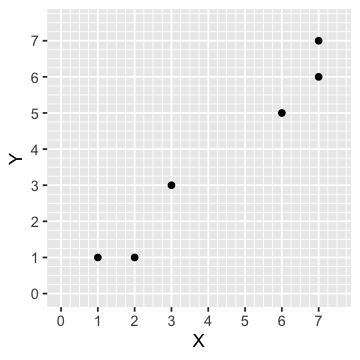

In [12]:
simple_data  <- tibble(X = c(1, 2, 3, 6, 7, 7),
               Y = c(1, 1, 3, 5, 7, 6))
options(repr.plot.width = 3, repr.plot.height = 3)
base <- ggplot(simple_data, aes(x = X, y = Y)) +
    geom_point() +
    scale_x_continuous(limits = c(0, 7.5), breaks = seq(0, 8), minor_breaks = seq(0, 8, 0.25)) +
    scale_y_continuous(limits = c(0, 7.5), breaks = seq(0, 8), minor_breaks = seq(0, 8, 0.25))
base 

Now consider these three **potential** lines of best fit for the same data set:

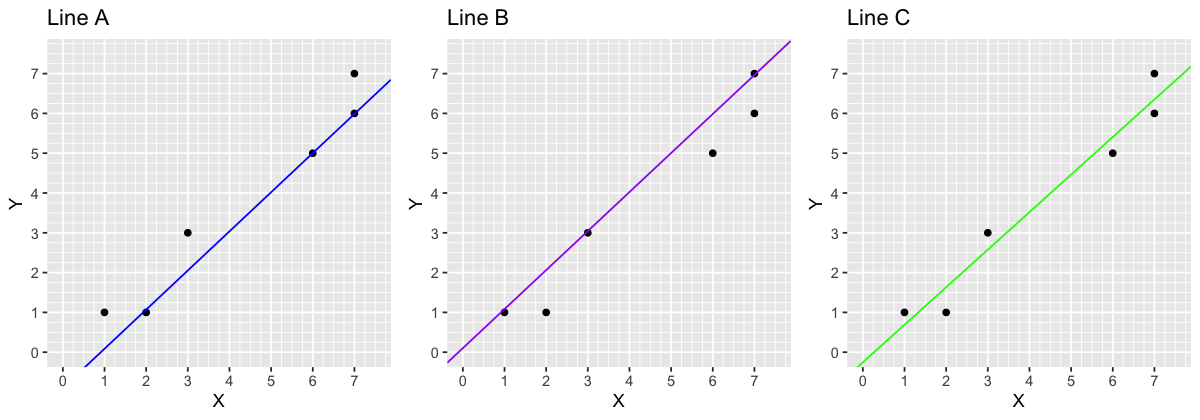

In [13]:
line_a <- base +
    ggtitle("Line A") +
    geom_abline(intercept = -0.897, slope = 0.9834, color = "blue")
line_b <- base +
    ggtitle("Line B") +
    geom_abline(intercept = 0.1022, slope = 0.9804, color = "purple")
line_c <- base +
    ggtitle("Line C") +
    geom_abline(intercept = -0.2547, slope = 0.9434, color = "green") 
options(repr.plot.width = 10, repr.plot.height = 3.5)
grid.arrange(line_a, line_b, line_c, ncol = 3)

**Question 2.0**
<br> {points: 1}

Use the graph below titled "Line A" to roughly calculate the average squared vertical distance between the points and the blue line. Read values of the graph to a **precision of 0.25** (e.g. 1, 1.25, 1.5, 1.75, 2). Save your answer to a variable named `answer2.0`. 

*We re-reprint the plot for you in a larger size to make it easier to estimate the locations on the graph.*

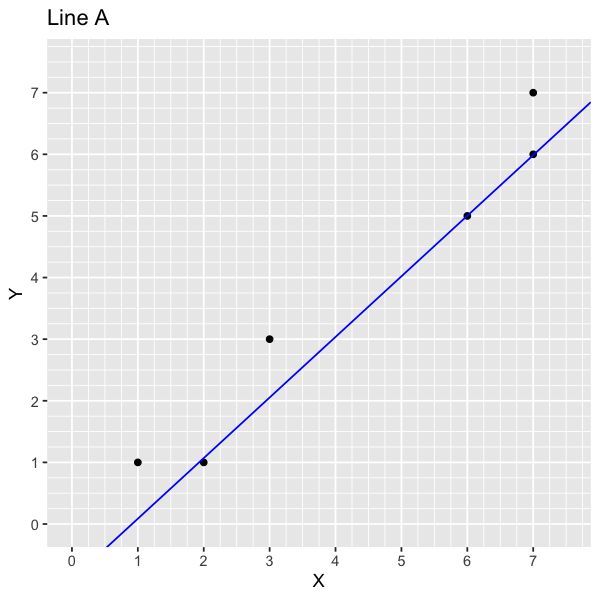

In [14]:
#run this code
options(repr.plot.width = 5, repr.plot.height = 5)
line_a

In [25]:
# your code here
# line eqn: 0.9834*() - 0.897
# answer2.0 = mean(c((0.9834*(1) - 0.897), 
#                    (0.9834*(1.25) - 0.897),
#                    (0.9834*(1.5) - 0.897),
#                    (0.9834*(1.75) - 0.897),
#                    (0.9834*(2) - 0.897)))
answer2.0 = mean(c((0.9834*(1) - 0.897 - 1)^2,
                   (0.9834*(2) - 0.897 - 1)^2,
                   (0.9834*(3) - 0.897 - 3)^2,
                   (0.9834*(6) - 0.897 - 5)^2,
                   (0.9834*(7) - 0.897 - 6)^2,
                   (0.9834*(7) - 0.897 - 7)^2
))
answer2.0

[1] 0.4604545

In [26]:
test_2.0()

[1] "Success!"


**Question 2.1**
<br> {points: 1}

Use the graph titled "Line B" to roughly calculate the average squared vertical distance between the points and the purple line. Read values of the graph to a **precision of 0.25** (e.g. 1, 1.25, 1.5, 1.75, 2). Save your answer to a variable named `answer2.1`. 

*We re-reprint the plot for you in a larger size to make it easier to estimate the locations on the graph.*

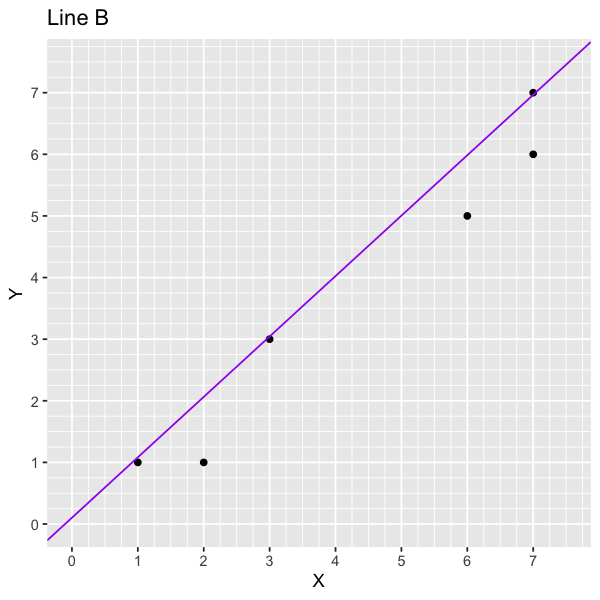

In [27]:
line_b

In [36]:
# your code here
answer2.1 = mean(c((0.9804*(1) + 0.1022 - 1)^2,
                   (0.9834*(2) + 0.1022 - 1)^2,
                   (0.9834*(3) + 0.1022 - 3)^2,
                   (0.9834*(6) + 0.1022 - 5)^2,
                   (0.9834*(7) + 0.1022 - 6)^2,
                   (0.9834*(7) + 0.1022 - 7)^2
))
answer2.1

[1] 0.5216547

In [37]:
test_2.1()

[1] "Success!"


**Question 2.2** 
<br> {points: 1}

Use the graph titled "Line C" to roughly calculate the average squared vertical distance between the points and the green line. Read values of the graph to a **precision of 0.25** (e.g. 1, 1.25, 1.5, 1.75, 2). Save your answer to a variable named `answer2.2`. 

*We re-reprint the plot for you in a larger size to make it easier to estimate the locations on the graph.*

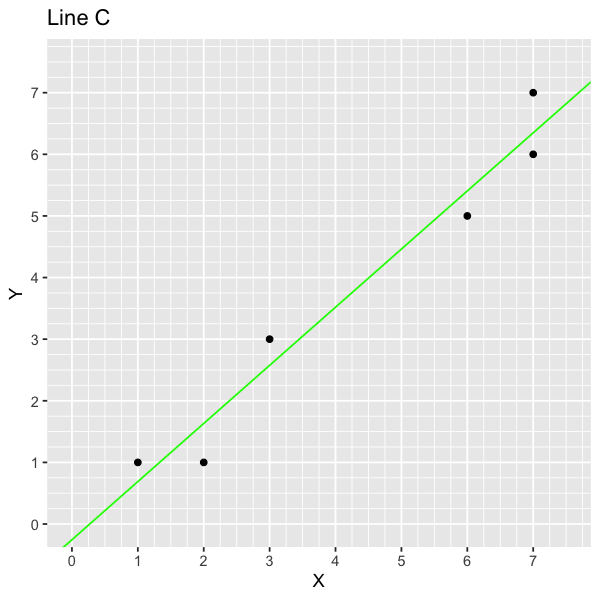

In [32]:
line_c

In [39]:
# your code here
answer2.2 = mean(c((0.9434*(1) - 0.2547 - 1)^2,
                   (0.9434*(2) - 0.2547 - 1)^2,
                   (0.9434*(3) - 0.2547 - 3)^2,
                   (0.9434*(6) - 0.2547 - 5)^2,
                   (0.9434*(7) - 0.2547 - 6)^2,
                   (0.9434*(7) - 0.2547 - 7)^2
))
answer2.2

[1] 0.2311321

In [40]:
test_2.2()

[1] "Success!"


**Question 2.3**
<br> {points: 1}

Based on your calculations above, which line would linear regression by ordinary least squares choose given our small and simple data set? Line A, B or C? Assign the letter that corresponds the line to a variable named `answer2.3`. Make sure you put quotations around the letter and pay attention to case.

In [41]:
# your code here
answer2.3 = "C"

In [42]:
test_2.3()

[1] "Success!"


## Marathon Training Revisited with Linear Regression!

<img src='https://media.giphy.com/media/BDagLpxFIm3SM/giphy.gif' width='400'>

Source: https://media.giphy.com/media/BDagLpxFIm3SM/giphy.gif

Remeber our question from last week: what predicts which athletes will perform better than others? Specifically, we are interested in marathon runners, and looking at how the maximum distance ran per week during training predicts the time it takes a runner to end the race? 

This time around however we will analyze the data using a simple linear regression. And then in the end we will compare our results to what we found last week with k-nn regression.

**Question 3.0**
<br> {points: 1}

Load the data and assign it to an object called `marathon`. 

In [43]:
# your code here
marathon = read_csv('data/marathon.csv')
head(marathon)

Parsed with column specification:
cols(
  age = col_double(),
  bmi = col_double(),
  female = col_double(),
  footwear = col_double(),
  group = col_double(),
  injury = col_double(),
  mf_d = col_double(),
  mf_di = col_double(),
  mf_ti = col_double(),
  max = col_double(),
  sprint = col_double(),
  mf_s = col_double(),
  time_hrs = col_double()
)



age,bmi,female,footwear,group,injury,mf_d,mf_di,mf_ti,max,sprint,mf_s,time_hrs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
35,23.59232,0,2,1,2,42195,4,10295,60,1,4.098592,2.859722
33,22.51830,0,2,2,2,42195,3,12292,50,0,3.432720,3.414444
38,25.56031,0,2,3,1,42195,4,10980,65,0,3.842896,3.050000
34,22.60793,0,2,1,1,42195,3,10694,88,1,3.945670,2.970556
39,24.97484,0,2,1,1,42195,2,13452,51,0,3.136708,3.736667
33,24.30183,1,2,2,1,42195,3,14940,40,0,2.824297,4.150000


In [44]:
test_3.0()

[1] "Success!"


**Question 3.1**
<br> {points: 1}

Create a training and testing dataset using 75% of the data as training data. Use `set.seed(2000)` and the `max` column as the input to `createDataPartition` (as we did in the last worksheet) so that we end up with the same training data set for simple linear regression that we had for k-nn regression (so we can compare our results between these two weeks). 

At the end of this question you should have 4 objects named `X_train`, `Y_train`, `X_test` and `Y_test`.

In [46]:
set.seed(2000) # DO NOT CHANGE THIS
# your code here
training_rows = marathon %>%
    select(max) %>% 
    unlist() %>%
    createDataPartition(p = 0.75, list = FALSE)

X_train <- marathon %>% 
 select(max) %>% 
 slice(training_rows) %>% 
 data.frame()

Y_train <- marathon %>% 
 select(time_hrs) %>% 
 slice(training_rows) %>% 
 unlist()

X_test <- marathon %>% 
 select(max) %>% 
 slice(-training_rows) %>% 
 data.frame()

Y_test <- marathon %>% 
 select(time_hrs) %>% 
 slice(-training_rows) %>% 
 unlist()

In [47]:
test_3.1()

[1] "Success!"


**Question 3.2**
<br> {points: 1}

Using only the training observations in the data set, create a scatterplot to assess the relationship between race time (`time_hrs`) given a particular value of maximum distance ran per week during training (`max`). Put `time_hrs` on the y-axis and `max` on the x-axis. Assign this plot to an object called `marathon_eda`. Remember to do whatever is necessary to make this an effective visualization.

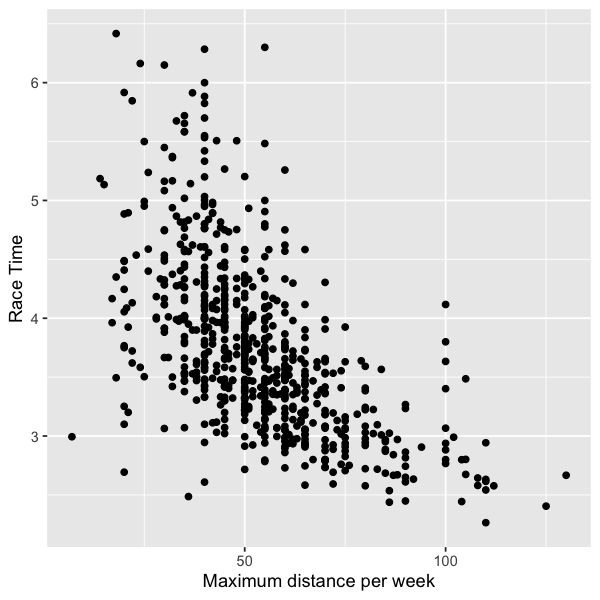

In [53]:
# your code here
marathon_eda = marathon %>%
    slice(training_rows) %>%
    ggplot(aes(x=max, y=time_hrs)) +
    geom_point() +
    labs(x="Maximum distance per week", y="Race Time")
marathon_eda

In [54]:
test_3.2()

[1] "Success!"


**Question 3.3**
<br> {points: 1}

Now use `caret`'s `train` function with `method = "lm"` to fit your simple linear regression model. Name your simple linear regression model object `lm_model`.

In [55]:
# your code here
lm_model = train(x=X_train, y=Y_train, method="lm")
lm_model

Linear Regression 

698 samples
  1 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 698, 698, 698, 698, 698, 698, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.5779413  0.3560371  0.4367106

Tuning parameter 'intercept' was held constant at a value of TRUE

In [56]:
test_3.3()

[1] "Success!"


**Question 3.4**
<br> {points: 1}

Now, let's visualize the model predictions as a straight line overlaid on the training data. Use `geom_smooth` with `method = "lm"` and `se = FALSE` to visualize the predictions as a straight line. Name your plot `lm_predictions`.

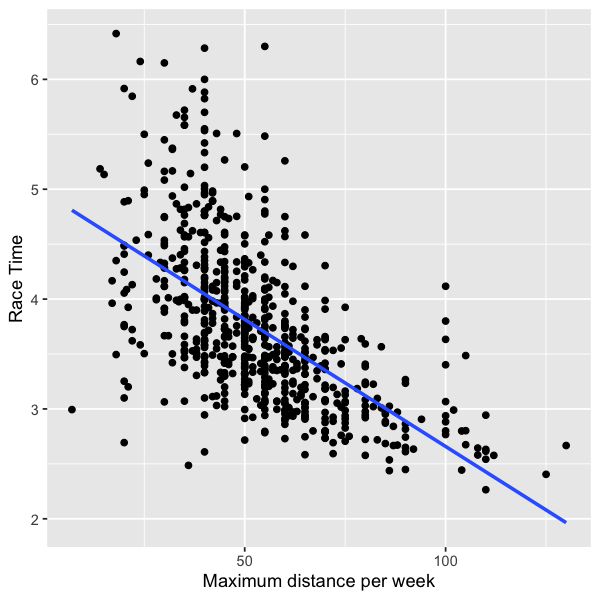

In [60]:
# your code here
lm_predictions = marathon_eda +
    geom_smooth(method = "lm", se = F)
lm_predictions

In [61]:
test_3.4()

[1] "Success!"


**Question 3.5**
<br> {points: 1}

Calculate the $RMSE$ to assess goodness of fit on your `lm_model` (remember this is how well it predicts on the **training data** used to fit the model). Return a single numerical value named `lm_rmse`.

In [78]:
# train_pred <- predict(lm_model, ...)
# lm_modelvalues <- data.frame(obs = ..., pred = ...)
# ... <- defaultSummary(...)[[1]]

# your code here
train_pred <- predict(lm_model, X_train)
lm_modelvalues <- data.frame(obs = Y_train, pred = train_pred)
lm_rmse <- defaultSummary(lm_modelvalues)[[1]]
lm_rmse

[1] 0.5891099

In [79]:
test_3.5()

[1] "Success!"


**Question 3.6**
<br> {points: 1}

Calculate $RMSPE$ using the **test data**. Return a single numerical value named `lm_rmspe`.

In [81]:
# your code here
test_pred = predict(lm_model, X_test)
lm_testvalues = data.frame(obs = Y_test, pred = test_pred)
lm_rmspe = defaultSummary(lm_testvalues)[[1]]
lm_rmspe

[1] 0.5987817

In [82]:
test_3.6()

[1] "Success!"


**Question 3.61**
<br> {points: 1}

Now, let's visualize the model predictions as a straight line overlaid on the test data. Use `geom_smooth` with `method = "lm"` and `se = FALSE` to visualize the predictions as a straight line. Name your plot `lm_predictions_test`. Remember to do whatever is necessary to make this an effective visualization.

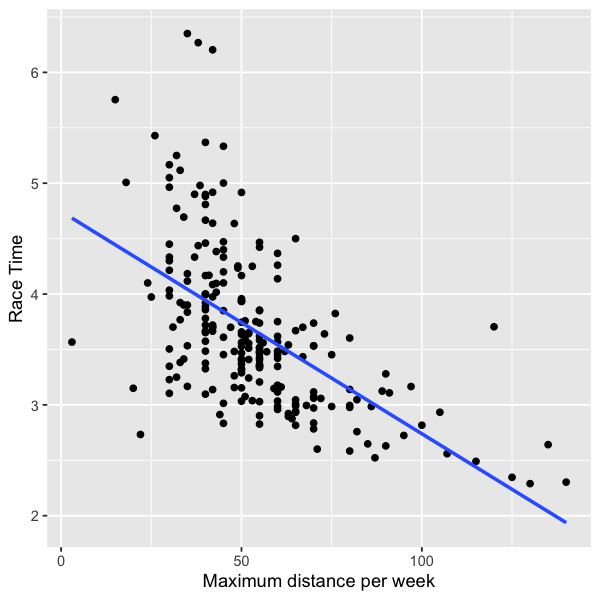

In [86]:
# your code here
lm_predictions_test = marathon %>%
    slice(-training_rows) %>%
    ggplot(aes(x=max, y=time_hrs)) +
    geom_point() +
    labs(x="Maximum distance per week", y="Race Time") +
    geom_smooth(method = "lm", se = F)
lm_predictions_test

In [87]:
test_3.61()

[1] "Success!"


**Question 3.7**
<br> {points: 1}

Compare the test RMPSE of k-nn regression (from last worksheet) to that of simple linear regression, which is greater? 

A. Simple linear regression has a greater RMSPE

B. k-nn regression has a greater RMSPE

C. Neither, they are identical

Save the letter of the answer you think is correct to a variable named `answer3.7`. Make sure you put quotations around the letter and pay attention to case.

In [90]:
# your code here
answer3.7 = 'A'

In [91]:
test_3.7()

[1] "Success!"


**Question 3.8** Multiple Choice: 
<br> {points: 1}

Which model does a better job of predicting on the test data set?

A. Simple linear regression 

B. k-nn regression 

C. Neither, they are identical

Save the letter of the answer you think is correct to a variable named `answer3.8`. Make sure you put quotations around the letter and pay attention to case.

In [94]:
# your code here
answer3.8 = "B"

In [95]:
test_3.8()

[1] "Success!"


**Question 3.9**
<br>*(optional - not graded)*

Given that the linear regression model is a straight line, we can write our model as a mathematical equation. We can get the two numbers we need for this (y-intercept and slope) from the `finalModel` attribute from our model object as shown below: 

In [ ]:
# run this cell
lm_model$finalModel

Use the numbers output in the cell above to write the model as a mathematical equation.

DOUBLE CLICK TO EDIT **THIS CELL** AND REPLACE THIS TEXT WITH YOUR ANSWER.